# Intro to AI Project

Group 4:

1. Piyush Sunil Borse 25PGAI0026
2. Prateek Majumder 25PGAI0027
3. Bhawana Thawarani 25PGAI0137
4. Prajwal Wagh 25PGAI0109
5. Yuvraj Singh Srinet 25PGAI0019

In [1]:
# Importing all necessary Libaries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
from sklearn.preprocessing import StandardScaler #Scaling the features
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pickle import dump
from sklearn.inspection import permutation_importance
from sklearn import svm

## Read Data and Analyse

In [2]:
# Read the data with pandas
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Checking the shape of the data
df.shape

(4269, 13)

In [4]:
#Reading the name of the columns
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
#Reading the name of the columns
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Data Exploration

In [8]:
# get correlation on numeric data

df.corr(numeric_only=True)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


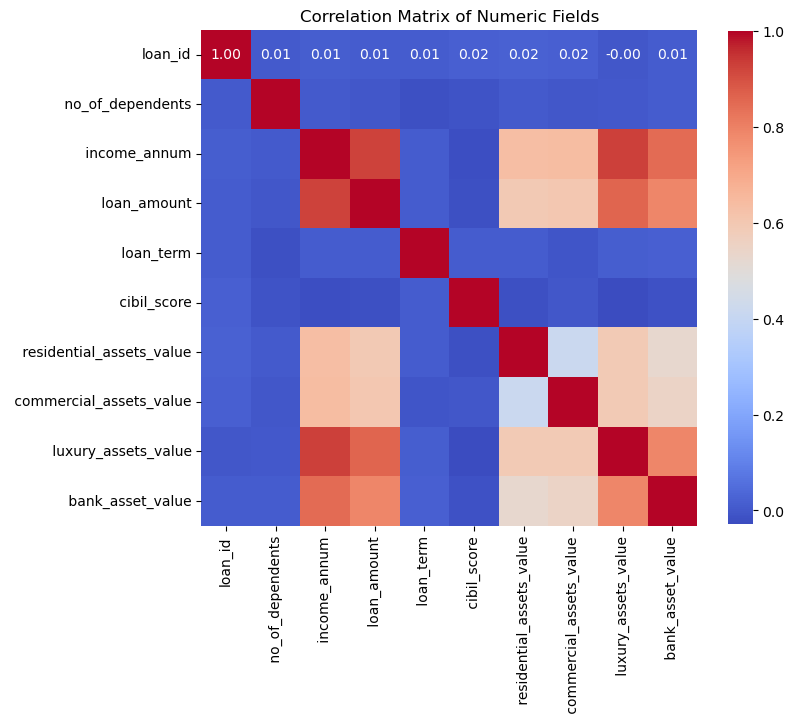

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numeric Fields")
plt.show()

In [10]:
# get discriptive statistics on "number" datatypes

df.describe(include = ['number'])

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
# get discriptive statistics on "objects" datatypes
df.describe(include = ['object'])

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [12]:
#removing some negative values in data
df = df[df[' residential_assets_value'] >= 0]

In [13]:
df.describe(include = ['number'])

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4241.000000,4241.000000,4.241000e+03,4.241000e+03,4241.000000,4241.000000,4.241000e+03,4.241000e+03,4.241000e+03,4.241000e+03
mean,2134.503419,2.497996,5.074251e+06,1.517840e+07,10.902146,599.685687,7.522613e+06,4.985121e+06,1.517121e+07,4.991488e+06
std,1231.649783,1.695599,2.803166e+06,9.034490e+06,5.708988,172.277302,6.495800e+06,4.391504e+06,9.094717e+06,3.249494e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.400000e+06
50%,2137.000000,3.000000,5.100000e+06,1.460000e+07,10.000000,600.000000,5.700000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3201.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,747.000000,1.140000e+07,7.700000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Data Count Analysis

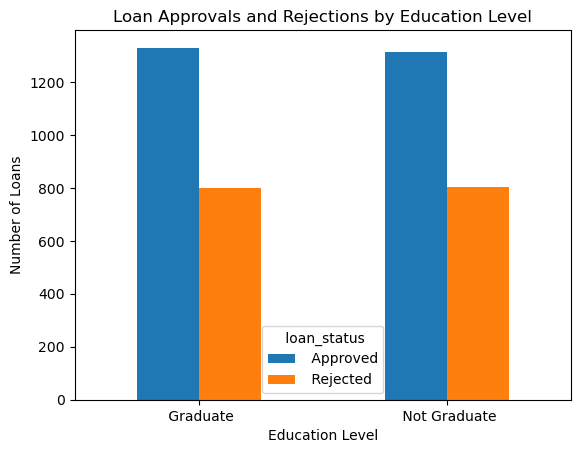

In [14]:
# Count loan approvals and rejections based on applicant education
loan_status_counts = df.groupby([' education', ' loan_status']).size().unstack()

# Plot the counts
loan_status_counts.plot(kind='bar', stacked=False)
plt.title('Loan Approvals and Rejections by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)

plt.show()

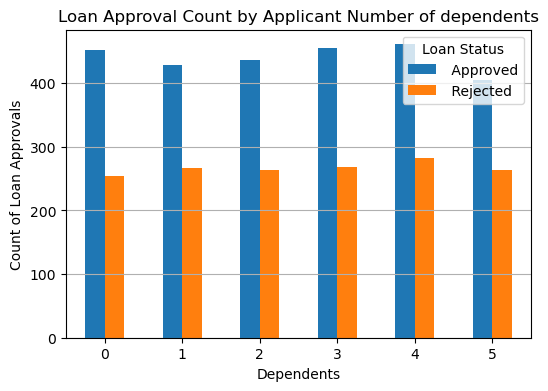

In [15]:
# Count loan approvals (yes and no) for Applicant Number of dependents
loan_approval_counts = df.groupby([' no_of_dependents', ' loan_status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 4))

# Add labels and title
plt.title('Loan Approval Count by Applicant Number of dependents')
plt.xlabel('Dependents')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

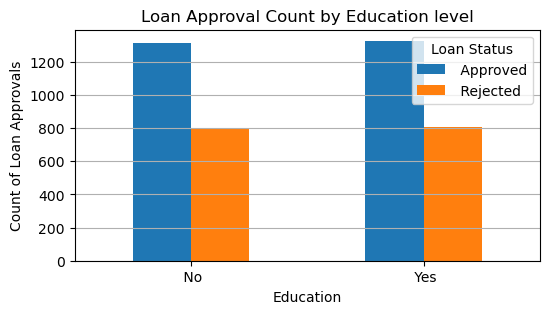

In [16]:
# Count loan approvals (yes and no) for applicant self_employed
loan_approval_counts = df.groupby([' self_employed', ' loan_status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count by Education level')
plt.xlabel('Education')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

### Distribution of Data:

In [17]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


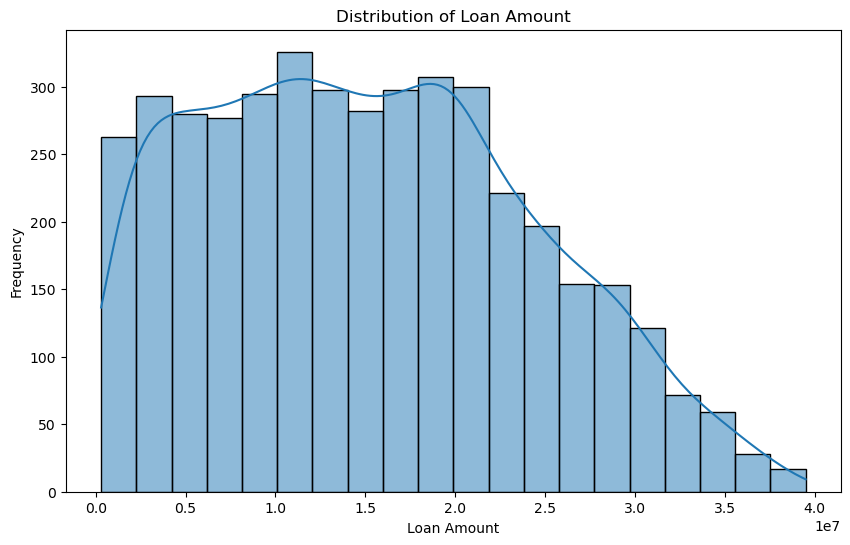

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' loan_amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


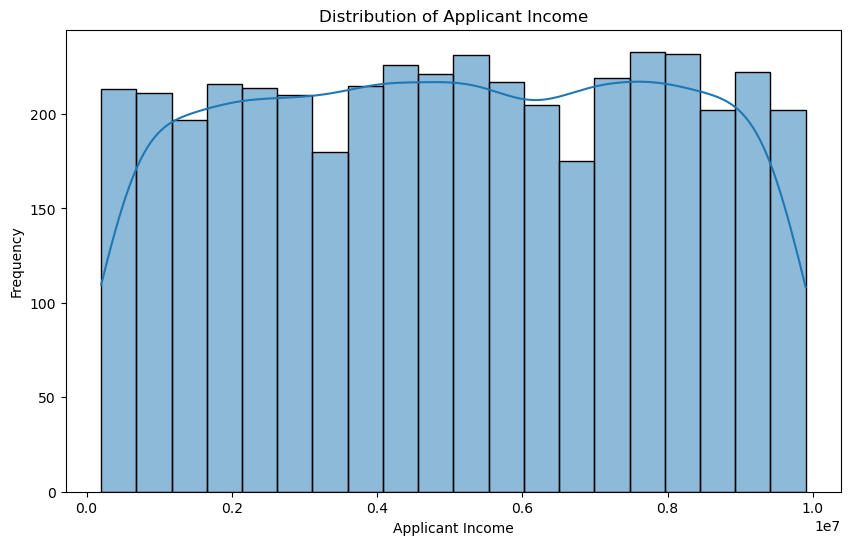

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' income_annum'], bins=20, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

### Numerical Data Analysis

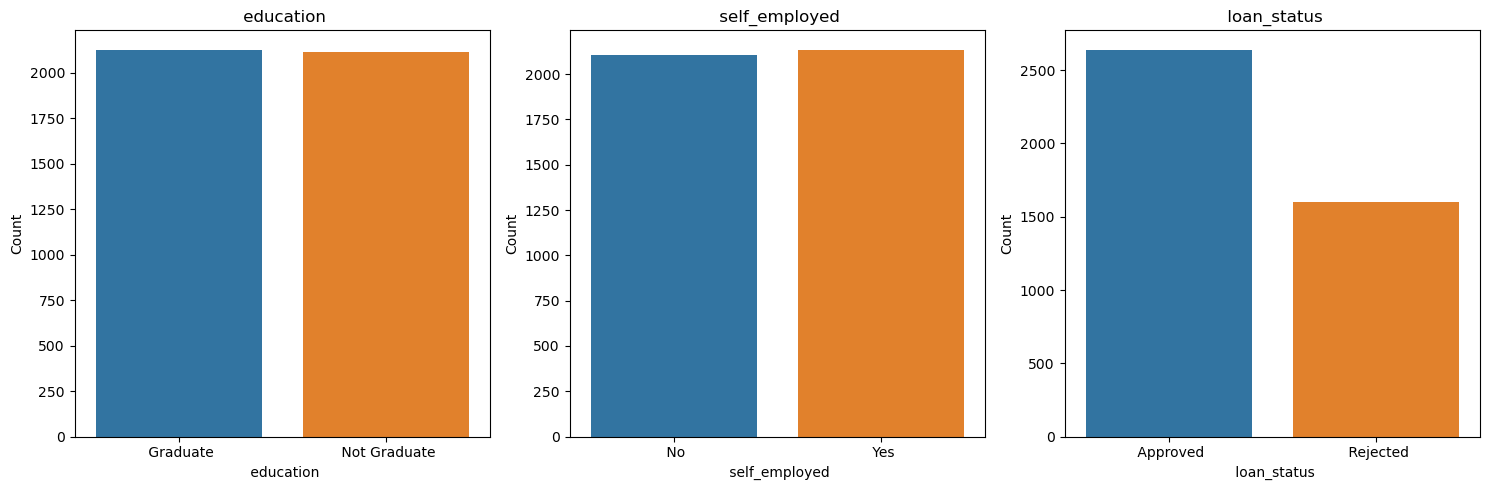

In [20]:
# Categorical columns in the dataset
categorical_cols = [ ' education', ' self_employed', ' loan_status']

# Plotting count plots for categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

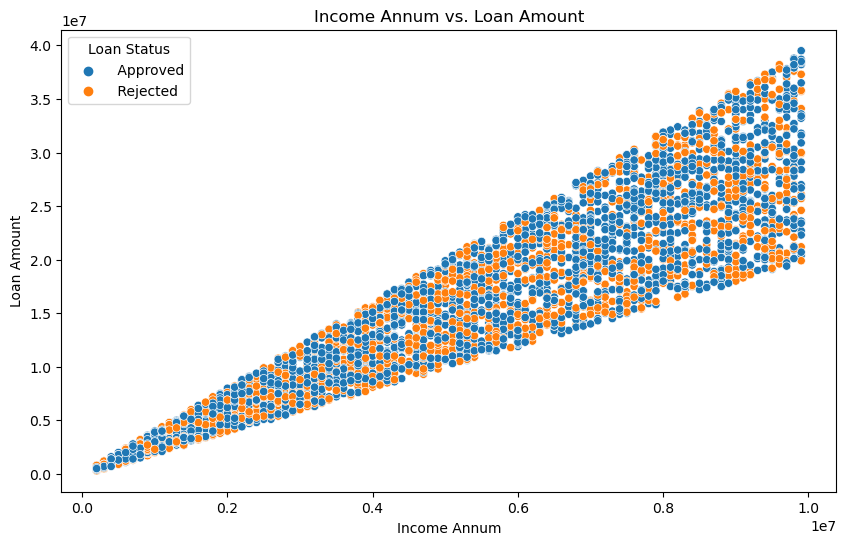

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' income_annum', y=' loan_amount', hue=' loan_status')
plt.title('Income Annum vs. Loan Amount')
plt.xlabel('Income Annum')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

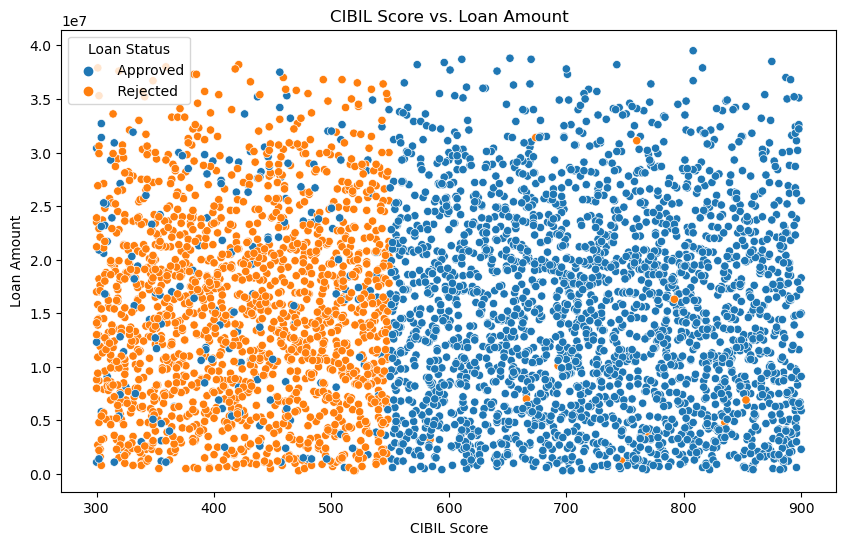

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' cibil_score', y=' loan_amount', hue=' loan_status')
plt.title('CIBIL Score vs. Loan Amount')
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

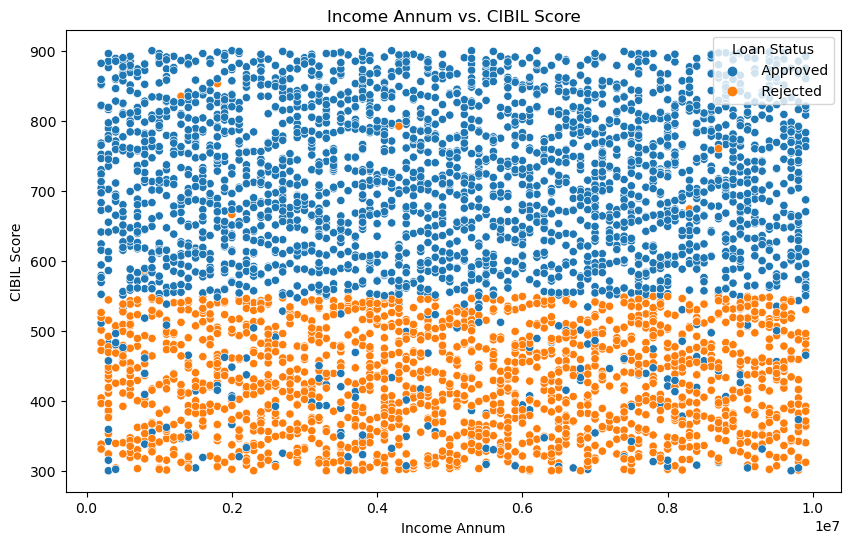

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' income_annum', y=' cibil_score', hue=' loan_status')
plt.title('Income Annum vs. CIBIL Score')
plt.xlabel('Income Annum')
plt.ylabel('CIBIL Score')
plt.legend(title='Loan Status')
plt.show()

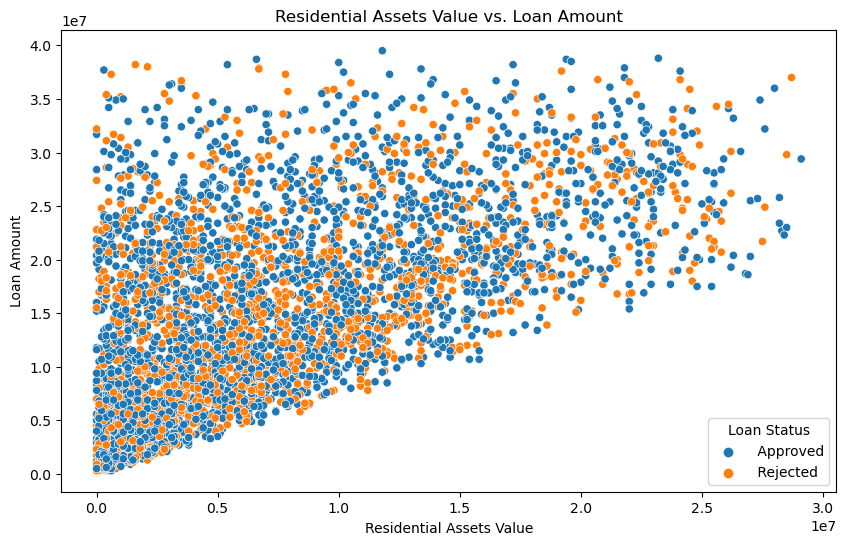

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' residential_assets_value', y=' loan_amount', hue=' loan_status')
plt.title('Residential Assets Value vs. Loan Amount')
plt.xlabel('Residential Assets Value')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

## Convert categorical variables into numerical ones:

In [25]:
# Check unique values in each categorical column
print("Unique values in 'education':", df[' education'].unique())
print("Unique values in 'self_employed':", df[' self_employed'].unique())
print("Unique values in 'loan_status':", df[' loan_status'].unique())

Unique values in 'education': [' Graduate' ' Not Graduate']
Unique values in 'self_employed': [' No' ' Yes']
Unique values in 'loan_status': [' Approved' ' Rejected']


In [26]:
# Convert categorical variables into numerical ones
df[' education'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df[' self_employed'] = df[' self_employed'].map({' Yes': 1, ' No': 0})
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})

In [27]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Data Scaling:

In [28]:
# Selecting features and target variable
X = df.drop(columns=['loan_id', ' loan_status'])
y = df[' loan_status']

# Scaling the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [29]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [30]:
X_scaled

array([[0.4       , 1.        , 0.        , ..., 0.90721649, 0.57583548,
        0.54421769],
       [0.        , 0.        , 1.        , ..., 0.11340206, 0.218509  ,
        0.2244898 ],
       [0.6       , 1.        , 0.        , ..., 0.23195876, 0.84832905,
        0.8707483 ],
       ...,
       [0.4       , 0.        , 0.        , ..., 0.63917526, 0.45758355,
        0.49659864],
       [0.2       , 0.        , 0.        , ..., 0.03608247, 0.35475578,
        0.39455782],
       [0.2       , 1.        , 0.        , ..., 0.60824742, 0.91002571,
        0.81632653]])

## Model Training and Prediction:

In [31]:
# Feature names
feature_names = X.columns.values

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(min_samples_split=4,min_samples_leaf=4,criterion='entropy' ),
    'SVM': svm.SVC(kernel='linear')
}

In [34]:
# Training and predicting with each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("--------------------------------------------------------")
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

--------------------------------------------------------
Logistic Regression Metrics:
Accuracy: 0.9144
Precision: 0.9278
Recall: 0.9381
F1 Score: 0.9329
Confusion Matrix:
[[406  59]
 [ 50 758]]

--------------------------------------------------------
Decision Tree Metrics:
Accuracy: 0.9772
Precision: 0.9815
Recall: 0.9827
F1 Score: 0.9821
Confusion Matrix:
[[450  15]
 [ 14 794]]

--------------------------------------------------------
Random Forest Metrics:
Accuracy: 0.9819
Precision: 0.9792
Recall: 0.9926
F1 Score: 0.9859
Confusion Matrix:
[[448  17]
 [  6 802]]

--------------------------------------------------------
SVM Metrics:
Accuracy: 0.9262
Precision: 0.9508
Recall: 0.9319
F1 Score: 0.9413
Confusion Matrix:
[[426  39]
 [ 55 753]]



## Feature Importance

In [35]:
X.columns.values

array([' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'], dtype=object)

### Logistic Regression

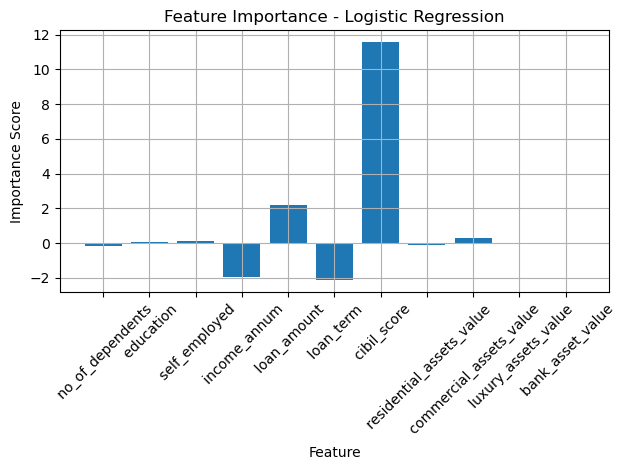

In [36]:
lr = models["Logistic Regression"]
importance = lr.coef_[0]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance)  # Replace 'x for x in range(len(importance))' with feature_names
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Logistic Regression')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid()
plt.show()

## Random Forest

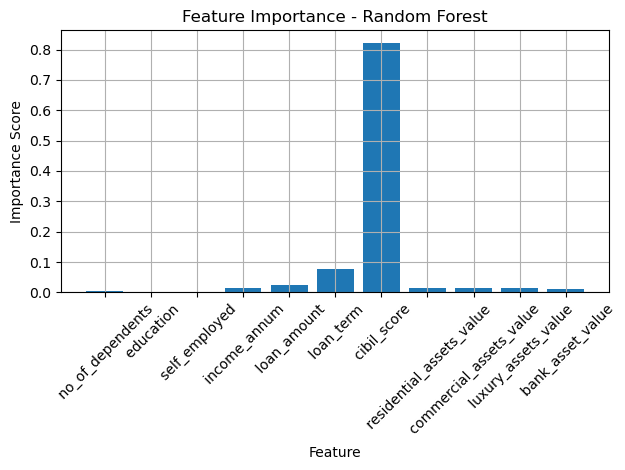

In [37]:
rf = models["Random Forest"]
# get importance
importance = rf.feature_importances_

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance)  # Replace 'x for x in range(len(importance))' with feature_names
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

## Decision Tree

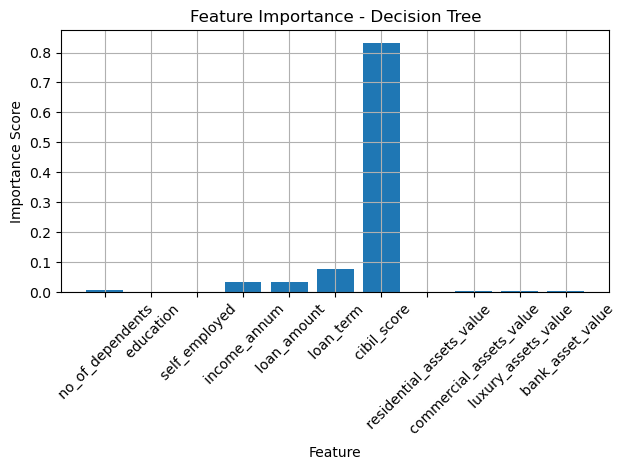

In [38]:
dt = models["Decision Tree"]
# get importance
importance = dt.feature_importances_

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance)  # Replace 'x for x in range(len(importance))' with feature_names
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

## Support Vector Machine

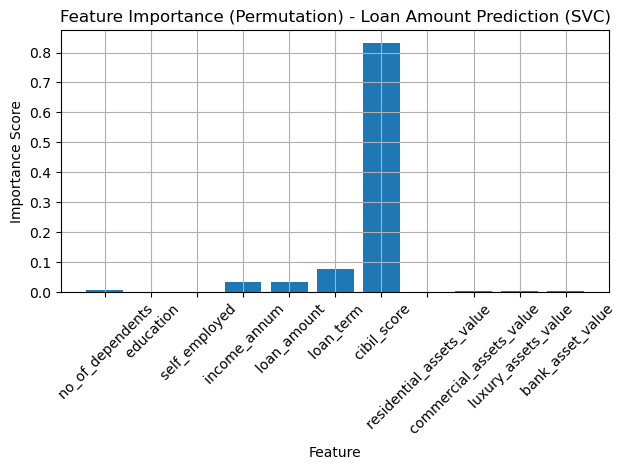

In [39]:
SVC = models["SVM"]
# Extract importance scores from weights
importance_linear = SVC.coef_.ravel()

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance (Permutation) - Loan Amount Prediction (SVC)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid()
plt.show()

### Doing a Sample Prediction on the Basis of Random Forest Classifier:

In [40]:
test=df.drop(columns=['loan_id', ' loan_status'])

In [41]:
#taking a sample data
test.iloc[2]

 no_of_dependents                   3
 education                          1
 self_employed                      0
 income_annum                 9100000
 loan_amount                 29700000
 loan_term                         20
 cibil_score                      506
 residential_assets_value     7100000
 commercial_assets_value      4500000
 luxury_assets_value         33300000
 bank_asset_value            12800000
Name: 2, dtype: int64

In [42]:
# Select a sample from the test set
sample = test.iloc[2].values.reshape(1, -1)

In [43]:
#seeing the sample data
sample

array([[       3,        1,        0,  9100000, 29700000,       20,
             506,  7100000,  4500000, 33300000, 12800000]], dtype=int64)

In [44]:
# Scale the sample
sample_scaled = scaler.transform(sample)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
sample_scaled

array([[0.6       , 1.        , 0.        , 0.91752577, 0.75      ,
        1.        , 0.34333333, 0.24398625, 0.23195876, 0.84832905,
        0.8707483 ]])

In [46]:
# Make a prediction using the Random Forest model
random_forest = models["Random Forest"]
sample_prediction = random_forest.predict(sample_scaled)

In [47]:
sample_prediction[0]

0

In [48]:
# save the model
dump(random_forest, open('model.pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))